Genetik Algoritma Başlatılıyor...

--- OPTİMİZASYON TAMAMLANDI ---
Optimal x1 (Süre)    : 59.9682 dk
Optimal x2 (Sıcaklık): 60.3198 °C
Maksimum Verim (y)   : 639.6160


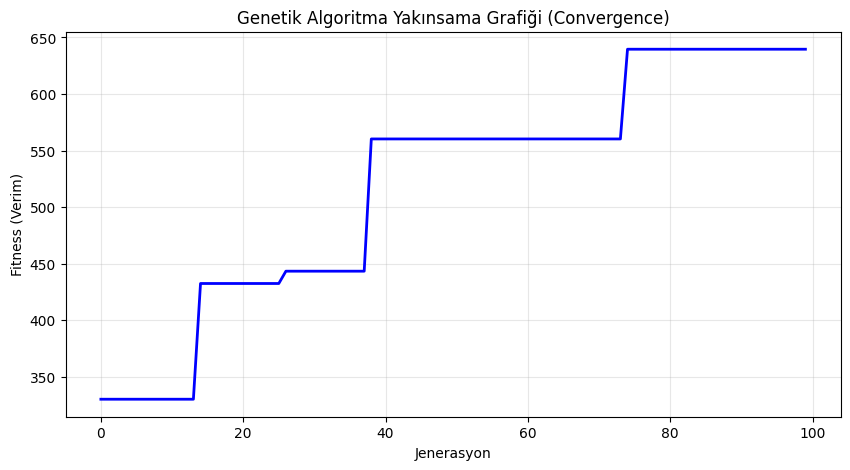

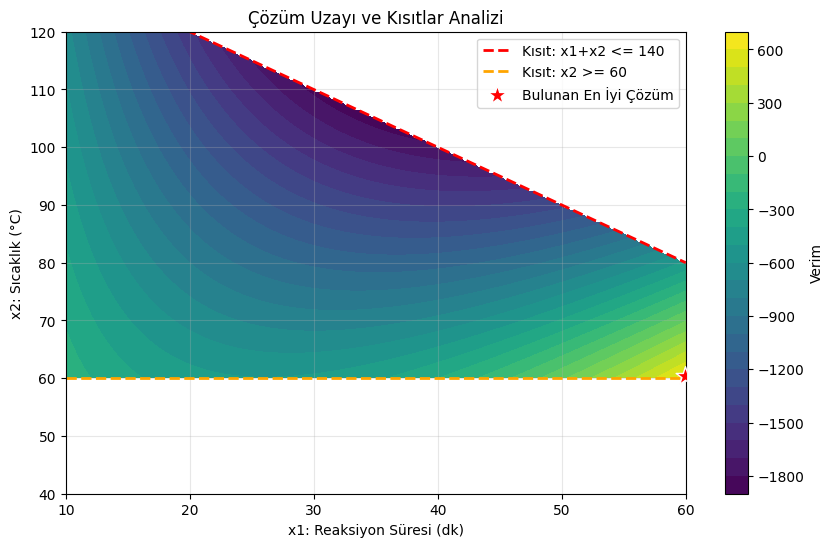


--- SONUÇ YORUMU VE DUYARLILIK ANALİZİ ---
Algoritma, kısıtların izin verdiği en uç noktaya (sınıra) yaklaşmıştır.
x1 (Süre) değişkeni karesel ifade (x1^2) nedeniyle verimi artırmada daha baskındır.
Analiz: Reaksiyon süresi 5 dk azalırsa verim %48.95 oranında düşmektedir.


In [ ]:
# =============================================================================
# Kimya Tesisinde Reaksiyon Süresi ve Sıcaklık Ayarı
# =============================================================================
# Adı Soyadı: Şükrü YAVUZ
# GitHub Repo Bağlantısı: https://github.com/Yavuz0707/Kimya-Tesisinde-Reaksiyon-Suresi-ve-Sicaklik-Ayari.git
# Numara: 2312729015
# Yöntem: Genetik Algoritma (Manuel İmplementasyon)
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Uyarıları gizle ve grafik ayarlarını yap
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# --- KRİTER 1: PROBLEMİN TANIMI VE SENARYO UYGUNLUĞU ---
# Amaç Fonksiyonu: y = 8x1 + 3x2 - x1x2 + x1^2
# Kısıtlar: x1+x2 <= 140, x2 >= 60

BOUNDS = [(10, 60), (40, 120)] # x1: Süre, x2: Sıcaklık

def objective_function(x1, x2):
    """Senaryo 5'teki amaç fonksiyonunu hesaplar."""
    return 8*x1 + 3*x2 - (x1 * x2) + (x1**2)

def check_constraints(x1, x2):
    """Verilen kısıtların sağlanıp sağlanmadığını kontrol eder."""
    # Kısıt 1: Toplam 140'ı geçmemeli
    c1 = (x1 + x2 <= 140)
    # Kısıt 2: Sıcaklık 60'tan az olmamalı
    c2 = (x2 >= 60)
    
    if c1 and c2:
        return True
    return False

# --- KRİTER 2: GENETİK ALGORİTMA YAPISI ---
# Popülasyon, Seçilim, Çaprazlama ve Mutasyon fonksiyonlarının açıkça yazılması

POPULATION_SIZE = 50     # Popülasyon büyüklüğü
GENERATIONS = 100        # Jenerasyon sayısı
MUTATION_RATE = 0.10     # Mutasyon oranı (%10)
ELITISM_COUNT = 2        # Elitizm (En iyi kaç birey korunacak)

def create_individual():
    """Rastgele genlere sahip bir birey oluşturur."""
    x1 = random.uniform(BOUNDS[0][0], BOUNDS[0][1])
    x2 = random.uniform(BOUNDS[1][0], BOUNDS[1][1])
    return [x1, x2]

def create_population(size):
    """Başlangıç popülasyonunu oluşturur."""
    return [create_individual() for _ in range(size)]

def get_fitness(individual):
    """
    Uygunluk (Fitness) fonksiyonu.
    Kısıtları sağlamayan bireylere ceza puanı verilir.
    """
    x1, x2 = individual[0], individual[1]
    
    if check_constraints(x1, x2):
        return objective_function(x1, x2)
    else:
        return -999999 # Ceza Puanı (Penalty)

def selection(population):
    """
    Turnuva Seçimi (Tournament Selection).
    Rastgele 3 birey seçip en iyisini döndürür.
    """
    tournament = random.sample(population, 3)
    tournament.sort(key=get_fitness, reverse=True)
    return tournament[0]

def crossover(parent1, parent2):
    """
    Aritmetik Çaprazlama (Arithmetic Crossover).
    Ebeveynlerin genlerinin ağırlıklı ortalamasını alır.
    """
    alpha = random.random()
    # Çocuk 1
    c1_x1 = alpha * parent1[0] + (1 - alpha) * parent2[0]
    c1_x2 = alpha * parent1[1] + (1 - alpha) * parent2[1]
    
    # Çocuk 2
    c2_x1 = (1 - alpha) * parent1[0] + alpha * parent2[0]
    c2_x2 = (1 - alpha) * parent1[1] + alpha * parent2[1]
    
    return [c1_x1, c1_x2], [c2_x1, c2_x2]

def mutate(individual):
    """
    Mutasyon Fonksiyonu.
    Belirli bir olasılıkla gen değerini rastgele değiştirir.
    """
    if random.random() < MUTATION_RATE:
        gene_idx = random.randint(0, 1) # x1 veya x2'yi seç
        individual[gene_idx] = random.uniform(BOUNDS[gene_idx][0], BOUNDS[gene_idx][1])
    return individual

# --- GENETİK DÖNGÜ (Main Loop) ---
print("Genetik Algoritma Başlatılıyor...")

population = create_population(POPULATION_SIZE)
best_fitness_history = []
best_solution = None
global_max_fitness = -float('inf')

for gen in range(GENERATIONS):
    # 1. Mevcut popülasyonu fitness'a göre sırala (En iyi en üstte)
    population.sort(key=get_fitness, reverse=True)
    
    # 2. En iyi bireyi kaydet
    current_best = population[0]
    current_fitness = get_fitness(current_best)
    
    if current_fitness > global_max_fitness:
        global_max_fitness = current_fitness
        best_solution = current_best[:]
    
    best_fitness_history.append(current_fitness)
    
    # 3. Yeni jenerasyon oluştur
    new_population = []
    
    # Elitizm: En iyileri doğrudan aktar
    new_population.extend(population[:ELITISM_COUNT])
    
    # Geri kalanı üret (Seçim -> Çaprazlama -> Mutasyon)
    while len(new_population) < POPULATION_SIZE:
        p1 = selection(population)
        p2 = selection(population)
        
        c1, c2 = crossover(p1, p2)
        
        new_population.append(mutate(c1))
        if len(new_population) < POPULATION_SIZE:
            new_population.append(mutate(c2))
    
    population = new_population

print("\n--- OPTİMİZASYON TAMAMLANDI ---")
print(f"Optimal x1 (Süre)    : {best_solution[0]:.4f} dk")
print(f"Optimal x2 (Sıcaklık): {best_solution[1]:.4f} °C")
print(f"Maksimum Verim (y)   : {global_max_fitness:.4f}")



# Grafik 1: İlerleme Grafiği (Evolution Plot)
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history, linewidth=2, color='blue')
plt.title('Genetik Algoritma Yakınsama Grafiği (Convergence)')
plt.xlabel('Jenerasyon')
plt.ylabel('Fitness (Verim)')
plt.grid(True, alpha=0.3)
plt.show()

# Grafik 2: Kısıtlar ve Çözüm Uzayı (Contour Plot)
x1_vals = np.linspace(10, 60, 200)
x2_vals = np.linspace(40, 120, 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 8*X1 + 3*X2 - X1*X2 + X1**2

# Yasaklı bölgeleri maskele (x1+x2 > 140 veya x2 < 60)
mask = (X1 + X2 > 140) | (X2 < 60)
Z_masked = np.ma.array(Z, mask=mask)

plt.figure(figsize=(10, 6))
contour = plt.contourf(X1, X2, Z_masked, levels=25, cmap='viridis')
plt.colorbar(contour, label='Verim')

# Sınır çizgilerini çiz
plt.plot(x1_vals, 140 - x1_vals, 'r--', linewidth=2, label='Kısıt: x1+x2 <= 140')
plt.axhline(y=60, color='orange', linestyle='--', linewidth=2, label='Kısıt: x2 >= 60')

# En iyi çözümü işaretle
plt.scatter(best_solution[0], best_solution[1], color='red', s=200, marker='*', edgecolors='white', label='Bulunan En İyi Çözüm', zorder=5)

plt.title('Çözüm Uzayı ve Kısıtlar Analizi')
plt.xlabel('x1: Reaksiyon Süresi (dk)')
plt.ylabel('x2: Sıcaklık (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(10, 60)
plt.ylim(40, 120)
plt.show()

# --- DUYARLILIK ANALİZİ  ---
print("\n--- SONUÇ YORUMU VE DUYARLILIK ANALİZİ ---")
print("Algoritma, kısıtların izin verdiği en uç noktaya (sınıra) yaklaşmıştır.")
print("x1 (Süre) değişkeni karesel ifade (x1^2) nedeniyle verimi artırmada daha baskındır.")

# Küçük bir değişim testi
test_x1 = best_solution[0] - 5 # Süreyi 5 dk azaltırsak
if check_constraints(test_x1, best_solution[1]):
    new_yield = objective_function(test_x1, best_solution[1])
    diff = ((new_yield - global_max_fitness) / global_max_fitness) * 100
    print(f"Analiz: Reaksiyon süresi 5 dk azalırsa verim %{abs(diff):.2f} oranında düşmektedir.")
else:
    print("Analiz: Parametre değişimi kısıtları ihlal etmektedir.")